# Directionality Feature
<br>
Ayush Thada
16BCE1333
<br><br>
Notebook available at <a href=https://github.com/itsayushthada/UTA-Fall2019> here</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

Assume the given image be:

In [2]:
np.random.seed(42)
img = np.random.randint(0, 256, (7,7))

print("Assume this is the given matrix or bitmap:\n\n{}".format(img))

Assume this is the given matrix or bitmap:

[[102 179  92  14 106  71 188]
 [ 20 102 121 210 214  74 202]
 [ 87 116  99 103 151 130 149]
 [ 52   1  87 235 157  37 129]
 [191 187  20 160 203  57  21]
 [252 235  88  48 218  58 254]
 [169 255 219 187 207  14 189]]


### Step I: Quantization

Let's quantization level be 10. It means all the values of iamge which is between [0,255] is converted to range [0, 9]. After that make sure you round off numbers to the nearest natural number. 

<center><font size=5>$Q(img, q\_level): [0, 255] \longmapsto [0, q\_level-1]$</font></center> 
<br>
<center><font size=5>$Q(img, q\_level) = \frac{img * (q\_level - 1)}{255-0}$</font></center>

In [3]:
q_img  = (img * (10-1) /255).astype(np.int16) 

print("On qunatizing the image in {} levels, we receive:\n\n{}".format(10, q_img))

On qunatizing the image in 10 levels, we receive:

[[3 6 3 0 3 2 6]
 [0 3 4 7 7 2 7]
 [3 4 3 3 5 4 5]
 [1 0 3 8 5 1 4]
 [6 6 0 5 7 2 0]
 [8 8 3 1 7 2 8]
 [5 9 7 6 7 0 6]]


### Step II: Padding

We have to pad the image with either zeros of the border pixels. This is important because the next step will reduce the length and width of image by 2 pixls units for each dimension.

In [4]:
def padding(img):
    (length, width) = img.shape[:2]
    
    p_img = np.ones((length+2, width+2)).astype(np.int16)
    p_img[1:-1, 1:-1] = q_img

    p_img[0, :] = p_img[1, :]
    p_img[-1, :] = p_img[-2, :]

    p_img[:, 0] = p_img[:, 1]
    p_img[:, -1] = p_img[:, -2]
    
    return p_img

In [5]:
p_img = padding(q_img)
print("On padding given image with border pixels, we receive:\n\n{}".format(p_img))

On padding given image with border pixels, we receive:

[[3 3 6 3 0 3 2 6 6]
 [3 3 6 3 0 3 2 6 6]
 [0 0 3 4 7 7 2 7 7]
 [3 3 4 3 3 5 4 5 5]
 [1 1 0 3 8 5 1 4 4]
 [6 6 6 0 5 7 2 0 0]
 [8 8 8 3 1 7 2 8 8]
 [5 5 9 7 6 7 0 6 6]
 [5 5 9 7 6 7 0 6 6]]


### Step III: Gradient Calculation

To calcualte the respective gradients we have to perform the simple convolution operation (this is different from what you have done is signal processing). Perform a point wise multiplication between the kernel matrix and the part of quantised image and then repalce the value of central pixel with the sum of all the products that we ahve calculated.

In [6]:
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

print("This is the kernel X which we will use to detect the vertical edges in image, one pixel wide \
and three pixel long.\n\n{}".format(kernel_x))

This is the kernel X which we will use to detect the vertical edges in image, one pixel wide and three pixel long.

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


In [7]:
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

print("This is the kernel Y which we will use to detect the horizontal edges in image, one pixel wide \
and three pixel long.\n\n{}".format(kernel_y))

This is the kernel Y which we will use to detect the horizontal edges in image, one pixel wide and three pixel long.

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


Gradient can be calculated in this way

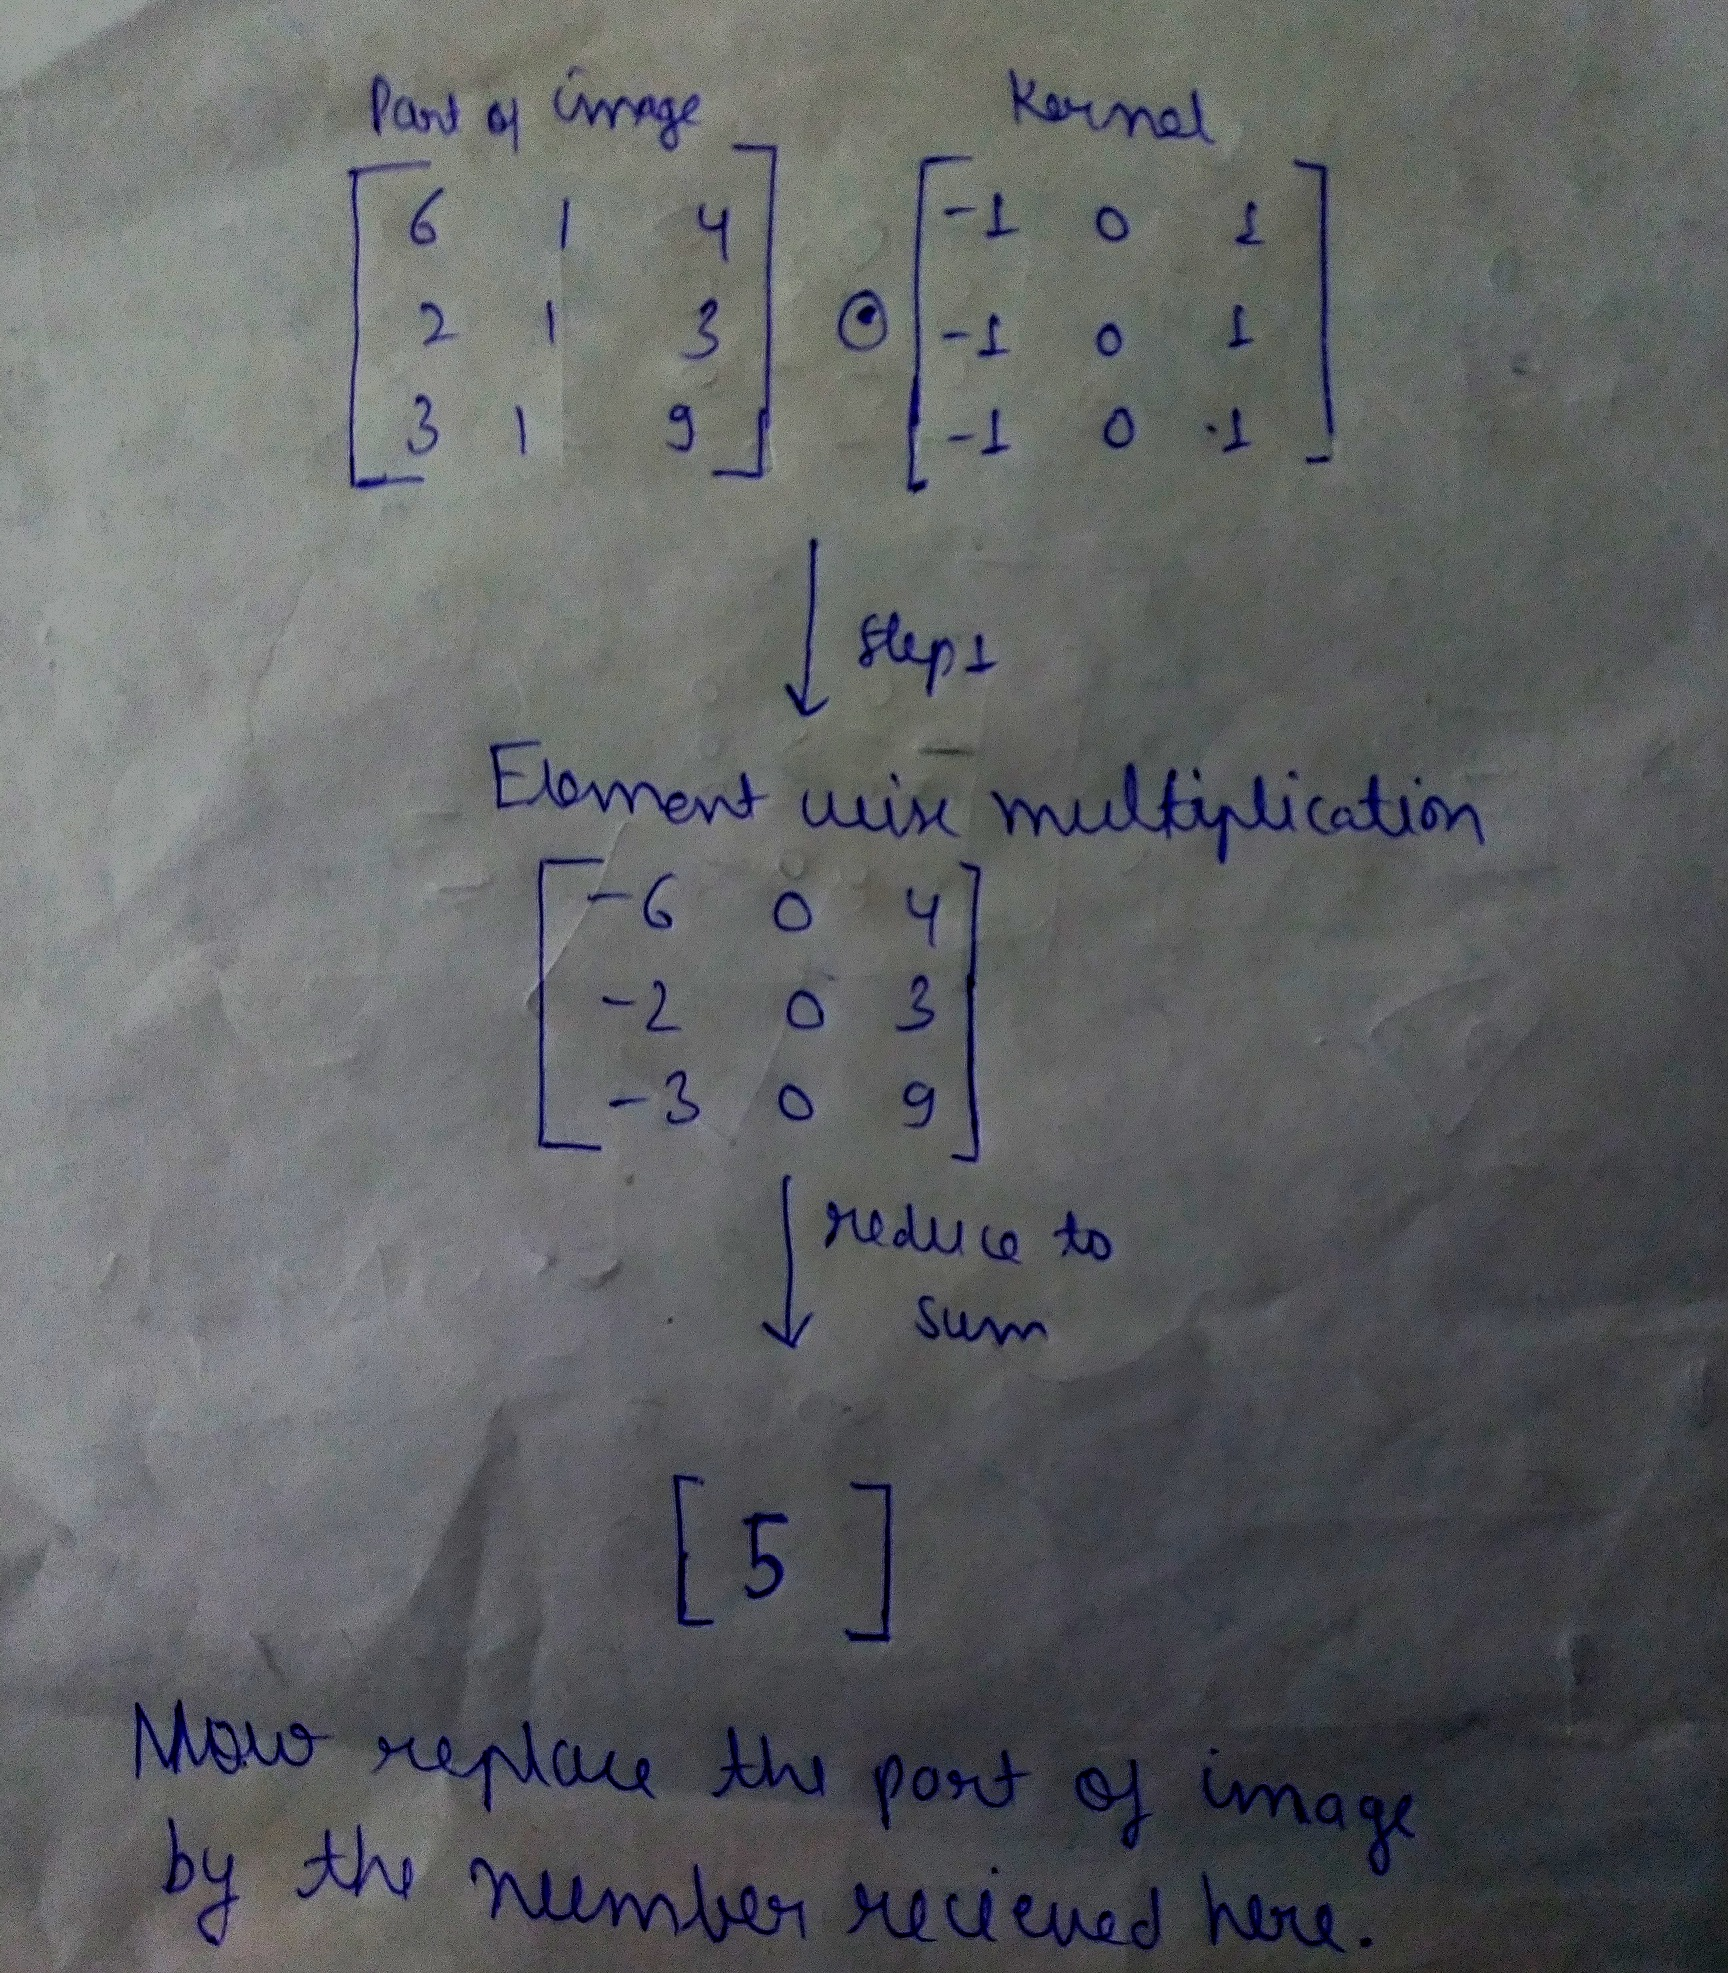

In [8]:
display(Image('img1.jpg', width = 600, height= 500))

In the below step I'm justing doing the operation demonstrated above over the whole iamge. This whole operation is sliding the kernel over the image and performing the operation demonstrated above.<br><br>
As we are looking ofr pattern in the x diection and y direction we hav to do this operation with $\Delta X$ and $\Delta Y$ kernels.

In [9]:
def partial_diff(img):
    length, width = img.shape[:2]
    
    del_x = np.ones((length-2, width-2)).astype(np.int16) # length of gradient will be 2 less than the length of original image.
    del_y = np.ones((length-2, width-2)).astype(np.int16) # Width of gradient will be 2 less than the width of original image.

    for i in range(1,length-1):
        for j in range(1,width-1):
            del_x[i-1, j-1] = np.sum(img[i-1:i+2,j-1:j+2] * kernel_x).astype(np.int16)
            del_y[i-1, j-1] = np.sum(img[i-1:i+2,j-1:j+2] * kernel_y).astype(np.int16)
        
    return del_x, del_y

del_x, del_y = partial_diff(p_img)

In [10]:
# del_x = Conv(padded_image, kernel_x)

print("This is the partial diffrentation of padded iamge with respect to X.\n\n{}".format(del_x))

This is the partial diffrentation of padded iamge with respect to X.

[[  9   4  -8   3  -1   6  13]
 [  7   4  -3   5  -2   3  10]
 [  3   6  11   7 -11  -1   9]
 [  0  -4   6  11  -9  -8   2]
 [ -1  -9   0  13  -9  -7   7]
 [  4  -9 -11  11  -8  -7  10]
 [  8  -1 -13   4 -11  -1  18]]


In [11]:
# del_y = Conv(padded_image, kernel_x)

print("This is the partial diffrentation of padded iamge with respect to Y.\n\n{}".format(del_y))

This is the partial diffrentation of padded iamge with respect to Y.

[[ -9  -5   5  12  11   5   2]
 [ -2  -2   1   5   7   3   0]
 [ -1  -3  -3  -2  -2  -6  -7]
 [  8   2   1   1   2  -5 -12]
 [ 22  15   1  -5  -4   7   9]
 [  1   9  11   8  -1   4  10]
 [ -5   2  10   9   3  -4  -6]]


### Step IV: Edge Strength

It is the mean of the absolute value del_x and del_y cacluated in the above steps. I'm using $H$ to represent the edge strength. It basically represents the strength of the edge which connects the adjacent pairs of pixels. 
Example: If you draw an image by hand using pencil, the edge streagth refers to the thickness of the stroke that you use for a particualr position in image.

<center><font size=5>$H = \frac{|\Delta x| + |\Delta y|}{2}$</font></center>

In [12]:
H = (np.abs(del_x) + np.abs(del_y))/2

print("This is the matrix of magnitude of the edges detected in image.\n\n{}".format(H))

This is the matrix of magnitude of the edges detected in image.

[[ 9.   4.5  6.5  7.5  6.   5.5  7.5]
 [ 4.5  3.   2.   5.   4.5  3.   5. ]
 [ 2.   4.5  7.   4.5  6.5  3.5  8. ]
 [ 4.   3.   3.5  6.   5.5  6.5  7. ]
 [11.5 12.   0.5  9.   6.5  7.   8. ]
 [ 2.5  9.  11.   9.5  4.5  5.5 10. ]
 [ 6.5  1.5 11.5  6.5  7.   2.5 12. ]]


### Step V: Directionality Angle

The next step is to cacualte the angle between the del_x and del_y. del_x corrosponds to horizintal edges in image and del_y corrospnds to vertical edges in image. to get the ange we hae to divide del_x by del_y and calcualte the inverse tangent of result. We will get the vaue in range [-$\pi$/2,$\pi$/2]. To convert the range into [0, $\pi$] we add $\pi$/2 to all the indices of the received array. I'm denoting this result as $\alpha$.

<center><font size=5>$\alpha = \frac{\pi}{2} + tan^{-1}\frac{\Delta x}{\Delta y}$</font></center>

The above operation is a point wise operation.

In [13]:
alpha = np.arctan(del_x/del_y) + (np.pi/2)

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


The result that we have received ie. $\alpha$ is in $radian$. Let's convert it in degress and check the ranges of the angles that we are getting. This is just for demonstration, you're not supposed to do this during written test.

In [14]:
alpha_degree = alpha * (180/np.pi)

print("This is the matrix of orientation of the edges detected in image.\n\n{}".format(np.around(alpha_degree, 2)))

This is the matrix of orientation of the edges detected in image.

[[ 45.    51.34  32.01 104.04  84.81 140.19 171.25]
 [ 15.95  26.57  18.43 135.    74.05 135.   180.  ]
 [ 18.43  26.57  15.26  15.95 169.7   99.46  37.87]
 [ 90.    26.57 170.54 174.81  12.53 147.99  80.54]
 [ 87.4   59.04  90.    21.04 156.04  45.   127.87]
 [165.96  45.    45.   143.97 172.87  29.74 135.  ]
 [ 32.01  63.43  37.57 113.96  15.26 104.04  18.43]]


We can observe that all the values are between the range 0 and 180.

# Step VI: Histogram

In this step we have to plot histogram for $H$ and $\alpha$. The histogram for $\alpha$ is relatively uniform for images without strong orientation and exhibits peaks for highly directional images. The histogram for $H$ represents the distribution of the different edge weights. 

We can quantise the values of $\alpha$ and $H$ matrixes before plotting histograms.

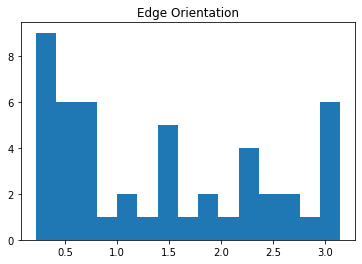

In [15]:
plt.hist(alpha.reshape(-1), bins=15)
plt.title("Edge Orientation")
plt.show()

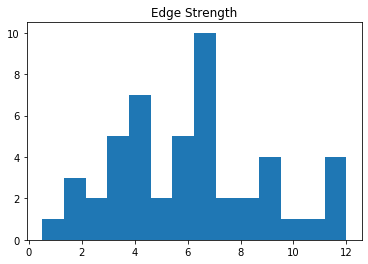

In [16]:
plt.hist(H.reshape(-1), bins=14)
plt.title("Edge Strength")
plt.show()

# Observations

Text(0.5, 1.0, 'Edge Strength Matrix')

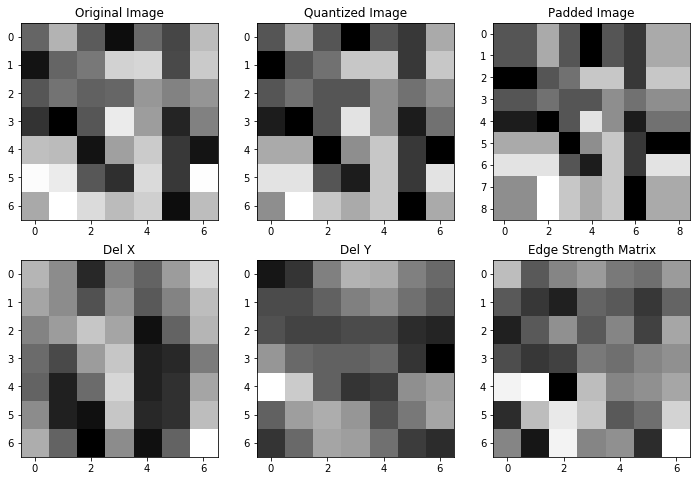

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(q_img, cmap="gray")
plt.title("Quantized Image")

plt.subplot(2, 3, 3)
plt.imshow(p_img, cmap="gray")
plt.title("Padded Image")

plt.subplot(2, 3, 4)
plt.imshow(del_x, cmap="gray")
plt.title("Del X")

plt.subplot(2, 3, 5)
plt.imshow(del_y, cmap="gray")
plt.title("Del Y")

plt.subplot(2, 3, 6)
plt.imshow(H, cmap="gray")
plt.title("Edge Strength Matrix")

# Real Scenario

In [18]:
car_img = np.dot(plt.imread("car.jpg")[...,:3], [0.2989, 0.5870, 0.1140])

In [19]:
car_delX, car_delY = partial_diff(car_img)

In [20]:
car_H = (np.abs(car_delX) + np.abs(car_delY))/2

Text(0.5, 1.0, 'Edge Strength')

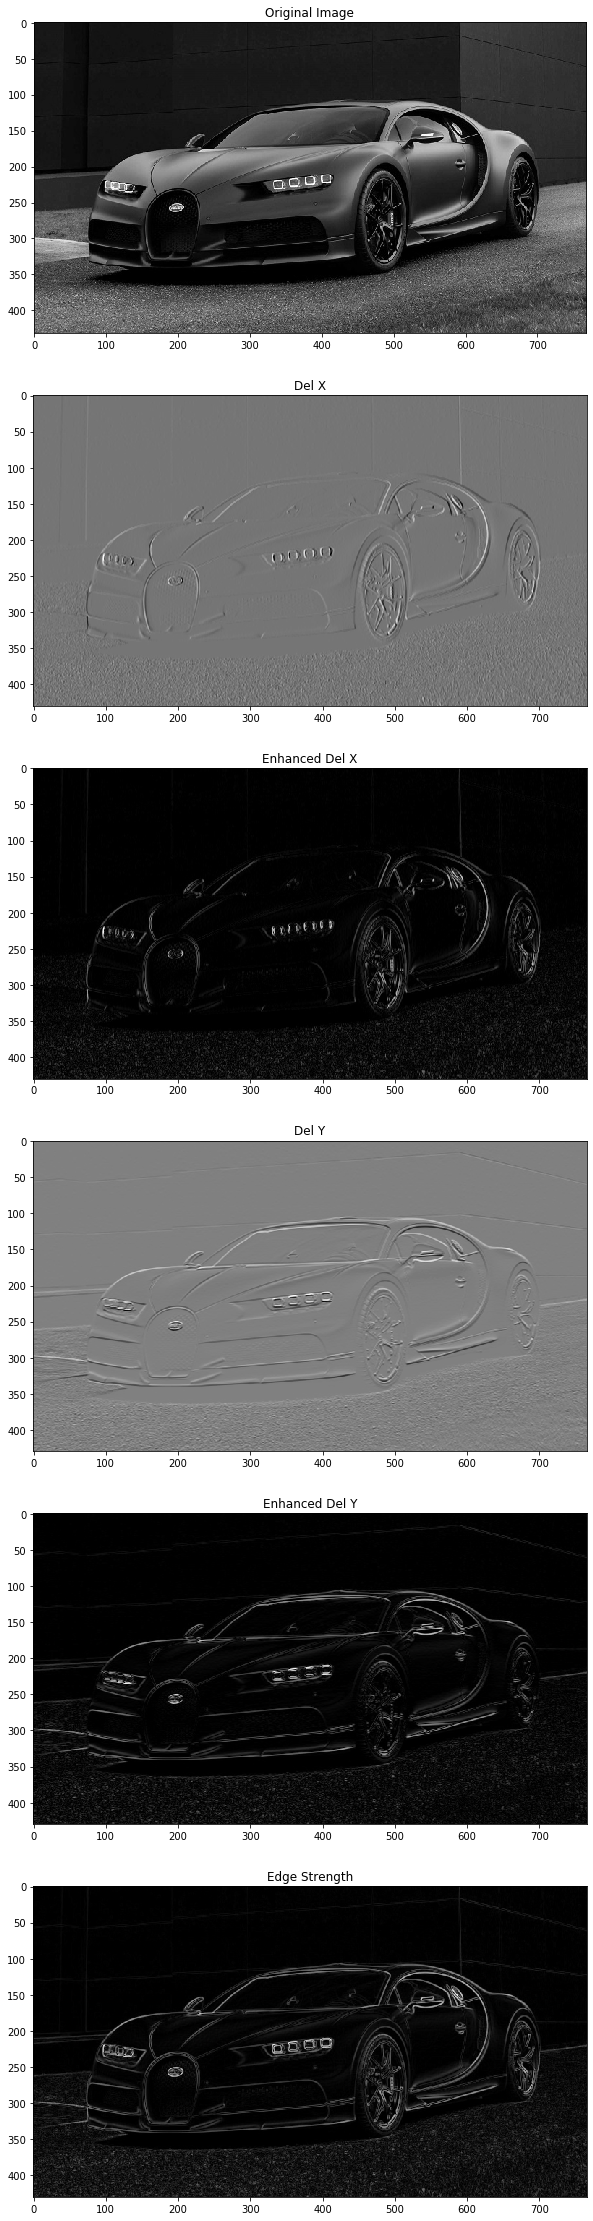

In [21]:
plt.figure(figsize=(16,40))

plt.subplot(6, 1, 1)
plt.imshow(car_img, cmap="gray")
plt.title("Original Image")

plt.subplot(6, 1, 2)
plt.imshow(car_delX, cmap="gray")
plt.title("Del X")

plt.subplot(6, 1, 3)
plt.imshow(1e-8*np.abs(car_delY) + 1e2*np.abs(car_delX), cmap="gray")
plt.title("Enhanced Del X")

plt.subplot(6, 1, 4)
plt.imshow(car_delY, cmap="gray")
plt.title("Del Y")

plt.subplot(6, 1, 5)
plt.imshow(1e-8*np.abs(car_delX) + 1e2*np.abs(car_delY), cmap="gray")
plt.title("Enhanced Del Y")

plt.subplot(6, 1, 6)
plt.imshow(car_H, cmap="gray")
plt.title("Edge Strength")